In [1]:
from pyk4a import PyK4A, Config
from copy import deepcopy

In [ ]:
config = Config()

In [13]:
# Load camera with the default config
k4a = PyK4A()
k4a.connect()

In [70]:
# Get the next color frame without the depth (blocking function)
img_color, img_depth = k4a.get_capture(color_only=False)

In [71]:
img_color.shape

(720, 1280, 4)

In [72]:
img_depth.shape

(720, 1280)

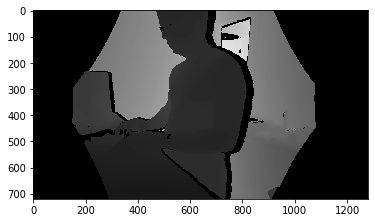

In [73]:
# Display with pyplot
from matplotlib import pyplot as plt
plt.imshow(img_depth, cmap='gray') # BGRA to RGB
plt.show()

In [74]:
k4a.disconnect()